In [4]:
import numpy as np 
import pickle 
import matplotlib.pyplot as plt 
import seaborn as sns
import random
import os
np.set_printoptions(suppress=True)

In [7]:
# collect[-1]['Observation'] = sstgcnn_['obs'][key]
# collect[-1]['GroundTruth'] = sstgcnn_['tarj'][key]
# collect[-1]['S-GAN'] = sgan_['pred'][key]
# collect[-1]['S-STGCNN'] = sstgcnn_['pred'][key]
# collect[-1]['S-Implicit'] = simplicit_['pred'][key]
# collect[-1]['Trajectron++'] = trajpp_['pred'][key]
# collect[-1]['ExpertTraj'] = expertraj_['pred'][key]
dset = 'eth' #change dest to 'eth', 'zara1', 'hotel' 
with open('./aligned/vis_'+dset+'.pkl', 'rb') as f:
    data = pickle.load(f)
output_dir= './' + dset + 'VisZoomed'
if not os.path.exists(output_dir):
  # Create a new directory because it does not exist 
  os.makedirs(output_dir)


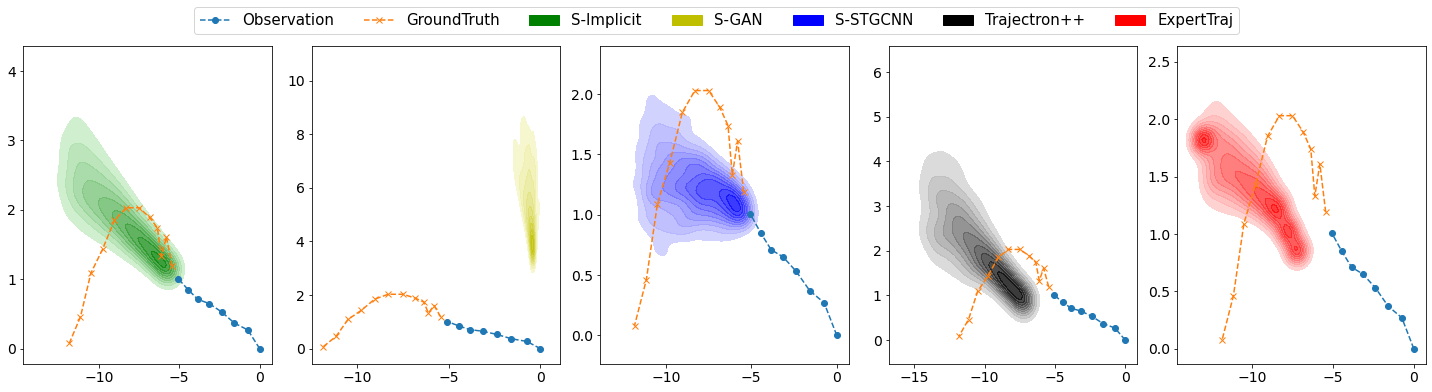

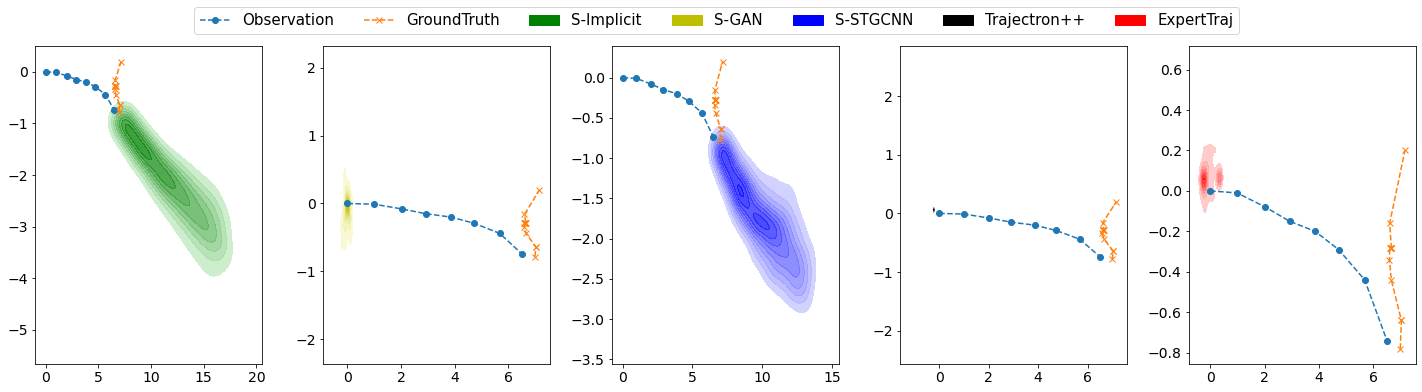

In [8]:
cmap = ['g', 'y', 'b', 'k', 'r']

indices= {}
indices['eth'] = list(range(200))
# indices['eth'] = [0, 95]
# indices['hotel'] = [419,701]
# indices['zara1'] = [2031,315,1290]


for key in indices[dset]:
    print('{}: {}'.format(dset, key))
    fig, ax = plt.subplots(1, 5, figsize=(20, 5))  #,sharex=True, sharey=True)
    for i in range(5):
        if i == 0:
            ax[i].plot(data[key]['Observation'][0],
                       data[key]['Observation'][1],
                       '--o',
                       label='Observation')
            ax[i].plot(data[key]['GroundTruth'][0],
                       data[key]['GroundTruth'][1],
                       '--x',
                       label='GroundTruth')
        else:
            ax[i].plot(data[key]['Observation'][0],
                       data[key]['Observation'][1], '--o')
            ax[i].plot(data[key]['GroundTruth'][0],
                       data[key]['GroundTruth'][1], '--x')

    sns.kdeplot(data[key]['S-Implicit'][:, 0].reshape(-1),
            data[key]['S-Implicit'][:, 1].reshape(-1),
            shade=True,
            shade_lowest=False,
            color=cmap[0],
            alpha=0.8,
            label='S-Implicit',
            ax=ax[0])

    sns.kdeplot(data[key]['S-GAN'][:, 0].reshape(-1),
            data[key]['S-GAN'][:, 1].reshape(-1),
            shade=True,
            shade_lowest=False,
            color=cmap[1],
            alpha=0.8,
            label='S-GAN',
            ax=ax[1])
    sns.kdeplot(data[key]['S-STGCNN'][:, 0].reshape(-1),
            data[key]['S-STGCNN'][:, 1].reshape(-1),
            shade=True,
            shade_lowest=False,
            color=cmap[2],
            alpha=0.8,
            label='S-STGCNN',
            ax=ax[2])
    sns.kdeplot(data[key]['Trajectron++'][:, 0].reshape(-1),
            data[key]['Trajectron++'][:, 1].reshape(-1),
            shade=True,
            shade_lowest=False,
            color=cmap[3],
            alpha=0.8,
            label='Trajectron++',
            ax=ax[3])
    sns.kdeplot(data[key]['ExpertTraj'][:, 0].reshape(-1),
            data[key]['ExpertTraj'][:, 1].reshape(-1),
            shade=True,
            shade_lowest=False,
            color=cmap[4],
            alpha=0.8,
            label='ExpertTraj',
            ax=ax[4])

    x_limit = ax[0].get_xlim()
    y_limit = ax[0].get_ylim()
    for i in range(5):
        ax[i].xaxis.set_tick_params(labelsize=14)
        ax[i].yaxis.set_tick_params(labelsize=14)
        ax[i].set_xlim(x_limit)
        ax[i].set_ylim(y_limit)

    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    fig.legend(lines,
           labels,
           loc="upper center",
           ncol=7,
           fontsize=15,
           bbox_to_anchor=(0.5, 1.1))
    plt.tight_layout()
    plt.savefig(output_dir+ '/case_' + dset + '_' + str(key) + '.png',
            dpi=300,
            bbox_inches='tight')
    plt.show()